## Question 2: Implementation of shalow neural netwrok with 1 hidden layer.

(a) 1D. Generate training data from a simple 1D function, such as a sine wave. You do not need to add noise to the function. Train your network to fit this data. Turn in a plot that shows the training data, along with a curve showing the function that your network computes.

**Sol:** Here we implement designing a neural network which will take arbitary number of inputs for arbitary dimensions. This network also has 1 hidden layer with arbitary number of hissen units in it. 
#### Loss Function
Regression loss function as given in the question.

#### Input 
Inputs are generated randomly by setting the number of training inputs and the dimensions.

#### Outputs 
The oputputs are limited to a single output. Here I have used **y=sin(x)** function to produce the ouputs.
If the there is a n dimensional input, output is a function of sin() for the first dimension and an summation of all the other subsequent dimensions.

#### Hyper Paramters
For this function there are three hyper paramters, that is the **Learning Rate** (Step Size), the number of **epochs** and the number of **hidden units**.


#### The Netwrok has 6 main Functions
1) Network Initialization
2) nonlin 
3) feed_forward
4) back_prop
5) update_network 
6) train

**Now lets got thorugh each function**


In [332]:
## Initialize the Network
def initialize_network(n_inputs, dimensions, n_hidden):
    if (dimensions==1):
        x= np.random.randn(n_inputs,1) ## Randomly Genrated Inputs
        y= np.sin(x)                   ## Generating Outputs
    else:
## Breaking the inputs such that, the first input goes to the sin curve and the rest, adds on as linear functions.        
        x= np.random.randn(n_inputs,dimensions) ## Randomly Genrated Inputs
        x1=np.reshape(x[:,0],(n_inputs,1)) 
        x2 = np.sum(x[:,1:],axis=1,keepdims= True) 
        y= np.sin(x1) + x2
    wts1= np.random.randn(dimensions,n_hidden)       ## Weight Initialization
    wts2= np.random.randn(n_hidden,1)                ## Weight Initialization
    b1 =  np.random.randn(n_hidden,1)                ## Bias Initialization
    b2 =  np.random.randn(1)                         ## Bias Initialization
    return x,y,wts1,wts2,b1,b2

## Non Linear Function RELU
def nonlin(x, deriv = False):
    if (deriv == True):
        return 1*(x>0)
    return np.maximum(0,x)

## Feed Forward Function
def feed_forward(x,wts1,wts2,b1,b2):
    a1= x.dot(wts1).transpose()+b1         ## calculating the Output
    a1_relu= nonlin(a1)
    a2 = a1_relu.T.dot(wts2)+ b2 
    return a1,a2

## Back Propogation by appling the four main formulas of back propogation
def back_prop(x,y,a1,a2,wts1,wts2):
    error = (((y-a2)**2).sum())                     ## Calculating the error
    d2 = a2 - y                                     ## Delta for final layer
    wt2_err = a1.dot(d2)                            ## Weight delta
    b2_err = (d2).sum()                             ## Bias delta
    d1= wts2.dot(d2.transpose())*(nonlin(a1,True))  ## delta for previous layer or first layer in our case
    wt1_err = x.T.dot(d1.transpose())               ## Weight delta
    b1_err = np.sum(d1,axis=1,keepdims= True)       ## Bias delta
    return wt2_err, wt1_err, b2_err, b1_err, error

## Updating the Network
def update_network(wts1,wts2,b1,b2,wt2_err,wt1_err,b2_err,b1_err,lr):
    wts2 -= lr*wt2_err                        ## Updating weights 
    b2 -= lr*b2_err                           ## Updating b
    wts1 -= lr*wt1_err                        ## Updating weights 
    b1 -= lr*b1_err                           ## Updating b
    return wts1,wts2,b1,b2

## Training the Network
def train(net,epochs,lr):
    error = []
    (wts1,wts2,b1,b2) = (net[2],net[3],net[4],net[5])
    for i in range(epochs):
        a= feed_forward(net[0],wts1,wts2,b1,b2)
        err= back_prop(net[0], net[1],a[0],a[1],net[2],net[3])
        error.append(err[4])
        update = update_network(net[2], net[3],net[4],net[5], err[0], err[1],err[2],err[3],lr)
        (wts1,wts2,b1,b2)= (update[0],update[1],update[2],update[3])
    return error, update[0], update[1],update[2],update[3]

## (a)Defining the Main Function and Implementing for 1D input

In [623]:
# Importing the Libraries
import numpy as np
from matplotlib import pyplot as plt
from math import exp
(n_inputs,dimensions,n_hidden)= (100,1,20) ## n_hidden = number of hidden units

# Initializing the Network
net=initialize_network(n_inputs,dimensions,n_hidden)

## Hyper Parameter Initialization
epochs= 1000
lr = 0.001
np.random.seed(1)
# net[0]
# print(net[1])

## Train
tr = train (net,epochs,lr)

### Plotting the Graphs 
<span style="color:red"></style>
**Red: Ground Truth Values **

<span style="color:blue"></style>
**Blue: Predicted Values**

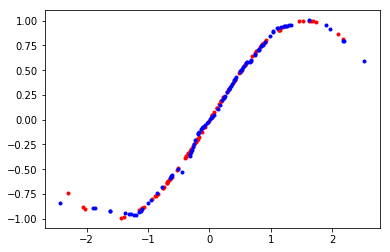

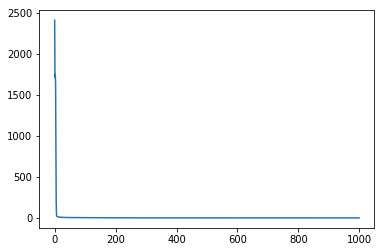

In [624]:
## Plotting the Outputs vs Inputs
if (dimensions==1):
        x= np.random.randn(n_inputs,1) ## Randomly Genrated Inputs
        y= np.sin(x)
else:
## Breaking the inputs such that, the first input goes to the sin curve and the rest adds on as linear functions        
        x= np.random.randn(n_inputs,dimensions) ## Randomly Genrated Inputs
        x1=np.reshape(x[:,0],(n_inputs,1)) 
        x2 = np.sum(x[:,1:],axis=1,keepdims= True) 
        y= np.sin(x1) + x2
plt.plot(x,y,'r.')

# Caluclating Predictions from the network
plt.plot(net[0], feed_forward(net[0],tr[1],tr[2],tr[3],tr[4])[1],'b.')
plt.show()

# Plotting the Error
plt.plot(tr[0])
plt.show()


### Important Inferences
1. For 1D input of sin() function, and keeping the n_inputs = 100, the hidden units have a proportional relation to accuracy uptil a certain extent. That is the more the hidden units the better the accuracy.
    * The accuracy continues to improve until n_hidden = 20, then it gradually starts decresing.
2. A learning rate of 0.001 is ideal. Anything higher than that, increases the weights significantly and anything lower than that will need significantly more epochs to get good accuracy. 

## (b)Defining the Main Function and Implementing for nD input

In [618]:
# Importing the Libraries
import numpy as np
from matplotlib import pyplot as plt
from math import exp
(n_inputs,dimensions,n_hidden)= (100,2,25) ## n_hidden = number of hidden units

# Initializing the Network
net=initialize_network(n_inputs,dimensions,n_hidden)

## Hyper Parameter Initialization
epochs= 1000
lr = 0.001
np.random.seed(1)
# net[0]
# print(net[1])

## Train
tr = train (net,epochs,lr)

### Plotting the Graphs 
<span style="color:red"></style>
**Red: Ground Truth Values **

<span style="color:blue"></style>
**Blue: Predicted Values**

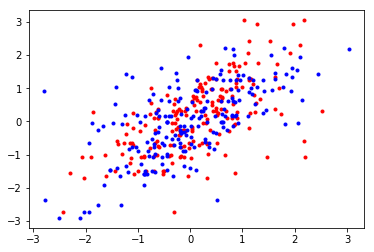

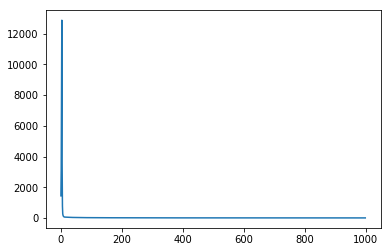

In [619]:
## Plotting the Outputs vs Inputs
if (dimensions==1):
        x= np.random.randn(n_inputs,1) ## Randomly Genrated Inputs
        y= np.sin(x)
else:
## Breaking the inputs such that, the first input goes to the sin curve and the rest adds on as linear functions        
        x= np.random.randn(n_inputs,dimensions) ## Randomly Genrated Inputs
        x1=np.reshape(x[:,0],(n_inputs,1)) 
        x2 = np.sum(x[:,1:],axis=1,keepdims= True) 
        y= np.sin(x1) + x2
plt.plot(x,y,'r.')

# Caluclating Predictions from the network
plt.plot(net[0], feed_forward(net[0],tr[1],tr[2],tr[3],tr[4])[1],'b.')
plt.show()

# Plotting the Error
plt.plot(tr[0])
plt.show()


### Important Inferences
1. Increasing the number of hidden units helps converge faster and increase in the number of dimensions has the opposite effect.
2. Even after trying varied amount of hyperparamters I was unable to get a good predictive function.
3. Keeping the dimensions and number of inputs fixed, and playing with the learning rate,epochs and the hidden units I was not able to find any value of hidden units that was able to give a an accurate predicitve function.

## (c) Hyperparameter tuning comparison for 1D and nD

* As the number of hyperparamters increased, getting the right set of hyper paramters became equally difficult.
* For the 1D case,I was able to get a good predictive function by adjusting the number of hidden units.
* but for nD, any number of tweaks in the hyper parameters did not result in a good predictive function.
* Therefore, for the nD case, a deeper network might sove this issue. 